In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

# Crunchbase startups dataset (updated till 2015)

#### We have four datasets: Companies, acquisitions, investments and rounds.

In [34]:
comps = pd.DataFrame.from_csv('/Users/harishprabhala/Downloads/crunchbase-data-master/companies.csv', index_col=None)
acqui = pd.DataFrame.from_csv('/Users/harishprabhala/Downloads/crunchbase-data-master/acquisitions.csv', index_col=None)
invest = pd.DataFrame.from_csv('/Users/harishprabhala/Downloads/crunchbase-data-master/investments.csv', index_col=None)
rounds = pd.DataFrame.from_csv('/Users/harishprabhala/Downloads/crunchbase-data-master/rounds.csv', index_col=None)

In [35]:
comps.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [36]:
comps.founded_at.isnull().sum()

15221

#### There are 15221 companies whose 'founded_at' dates are null. So, we fill those null values with the dates when their first funding took place.

In [37]:
comps.founded_at.fillna(value=comps.first_funding_at, inplace=True)

In [38]:
comps.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,2015-01-05,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,2014-01-30,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [41]:
comps.name.value_counts().sum() #Total number of companies in the dataset.

66367

In [47]:
comps.country_code.describe()

count     59410
unique      137
top         USA
freq      37601
Name: country_code, dtype: object

### Let's extract only the year from the 'founded_at' date since months and dates are not required at this point.

In [48]:
comps['founded_at'].head()

0    2015-01-05
1    2014-09-04
2    2014-01-30
3    2007-01-01
4    2010-01-01
Name: founded_at, dtype: object

In [119]:
year = comps.founded_at.replace({'-': ''}, regex=True)
year = year.apply(np.float)
year = year//10000
pd.set_option('precision', 0)
year.head()

0    2015
1    2014
2    2014
3    2007
4    2010
Name: founded_at, dtype: float64

In [151]:
year = year.dropna()
yr = year.astype(int)

#### We will convert the years into their respective decades.

In [152]:
yr = yr//10*10
yr = yr.value_counts().nlargest(6)
yr

2010    39274
2000    22098
1990     3600
1980      763
1970      235
1960      108
Name: founded_at, dtype: int64

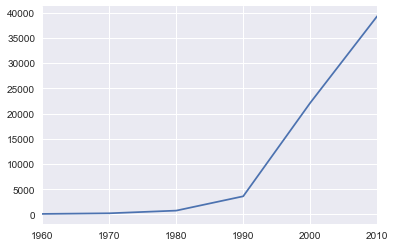

In [154]:
yr.sort_index().plot()

#### In the above line plot, we can see a trend that the startup activity started accelerating around 1990's which is around when the personal computers era had begun. 

In [156]:
comps.status.value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

### Which are the top 10 most entrepreneurial countries?

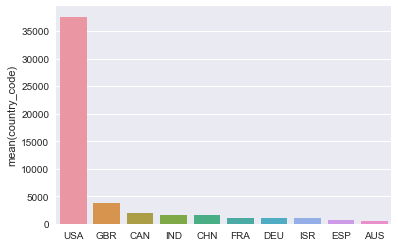

In [225]:
sns.barplot(x=comps.country_code.value_counts().head(10).index, y=comps.country_code.value_counts().head(10))

#### Clearly (and not surprisingly), USA is disproportionately leading the pack by a factor of 7 against the next most entrepreneurial country, Great Britan. It is interesting to see that India and China has more entrepreneurial spirit than some other european countries.

In [158]:
usa = comps[comps.country_code == 'USA']
usa.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,-,operating,USA,NC,NC - Other,Connellys Springs,1,2013-04-21,2013-04-21,2013-04-21


## Which states in the US have the most number of startups?

In [228]:
usa.region.value_counts().head(10)

SF Bay Area         8804
New York City       3527
Boston              2378
Los Angeles         1877
Seattle             1207
Washington, D.C.    1035
Chicago              980
San Diego            899
Denver               831
Austin               825
Name: region, dtype: int64

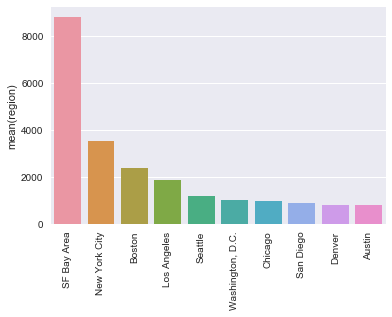

In [252]:
a = sns.barplot(x=usa.region.value_counts().head(10).index, y=usa.region.value_counts().head(10))
a.set_xticklabels(usa.region.value_counts().head(10).index,rotation=90)

## What are the top 10 most entrepreneurial sectors?

In [230]:
usa.category_list.value_counts().head(10)

Software               2674
Biotechnology          2658
Health Care             691
Clean Technology        677
Curated Web             642
Health and Wellness     632
Mobile                  625
Hardware + Software     611
Enterprise Software     573
E-Commerce              538
Name: category_list, dtype: int64

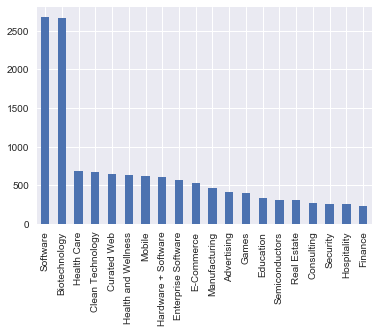

In [161]:
usa.category_list.value_counts().head(20).plot(kind='Bar')

##### Software and biotechnology seem to have the highest and almost an equal number of startups.

### Let us look at how the startups are faring in these sectors. First let's look at which sectors get acquired the most and in which states.

In [164]:
acqui.company_category_list.value_counts().head(10)

Software               1459
Curated Web             580
Biotechnology           546
Enterprise Software     398
Mobile                  317
Games                   274
Advertising             268
E-Commerce              245
Hardware + Software     233
Semiconductors          211
Name: company_category_list, dtype: int64

#### Although software and biotech have the same number of new startups, companies in the software sector get acquired the most and the acquisition numbers are almost 3-4 times higher than biotech.

#### Below - The acquisition activity, not surprisingly, has been the most in the SF Bay Area or the Silicon Valley. New York has been the second best hot bed for acquisitions. Outside US, London has been a great place to get acquired if you are a startup.

In [238]:
#acqui.head()
acqui.company_region.value_counts().head(10)

SF Bay Area         2465
New York City        791
Boston               697
London               568
Los Angeles          442
Chicago              386
Washington, D.C.     342
Seattle              339
Denver               249
San Diego            237
Name: company_region, dtype: int64

### So, what's going on with the Biotech startups? 

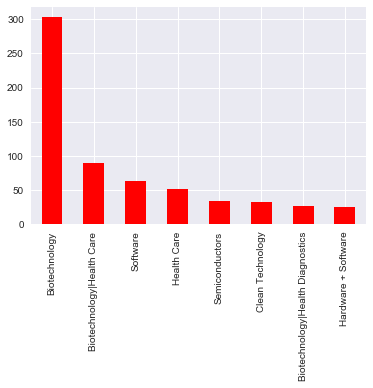

In [241]:
ipo = comps[comps.status == 'ipo'] #startups that go public
ipo.category_list.value_counts().head(8).plot(kind='Bar', color = 'r')

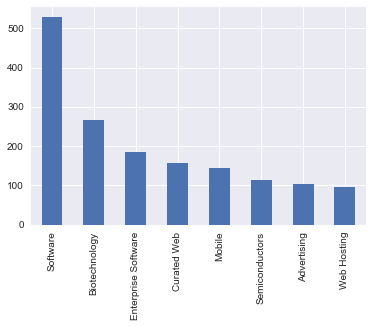

In [240]:
ipo = comps[comps.status == 'acquired'] # startups that get acquired
ipo.category_list.value_counts().head(8).plot(kind='Bar')

### Turns out, a majority of the biotech startups prefer going public than getting acquired. And the software startups prefer getting acquired than go public.

## Who's acquiring most of these software startups?

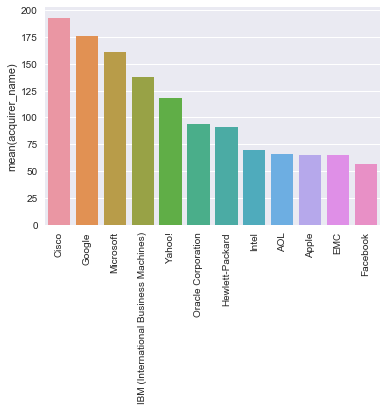

In [250]:
s = sns.barplot(x=acqui.acquirer_name.value_counts().head(12).index, y=acqui.acquirer_name.value_counts().head(12))
s.set_xticklabels(acqui.acquirer_name.value_counts().head(12).index,rotation=90)

## Cisco and Google have been the largest gobblers of software startups around the world.

#### So, this is a close-to-definitive proof that if you want to be a startup that wants to be successfully acquired, the probability is the highest if you are in the software sector and located in the SF Bay Area. And if you want to be a biotech startup, the odds are high that your company will go public more than get acquired. Through this preliminary investigation, we can infer that in biotech, there are a lot less synergies in acquiring other biotech companies, hence the acquisition rate is 2-3 times lower than in software industry where the synergies of acquisition are much higher.


                                                *** END ***

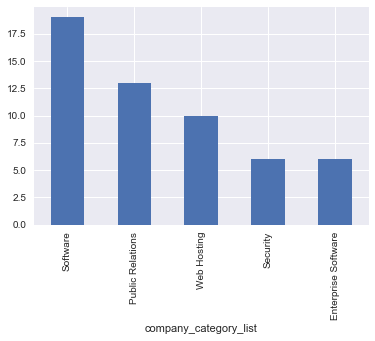

In [169]:
c = acqui[(acqui.acquirer_name == 'Cisco')]
g = c.groupby(['company_category_list']).size().sort_values(ascending=False)
g.nlargest(5).plot(kind='bar')

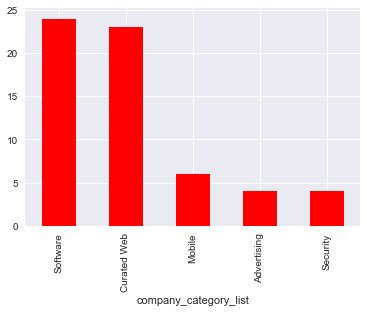

In [170]:
goog = acqui[(acqui.acquirer_name == 'Google')]
go = goog.groupby(['company_category_list']).size().sort_values(ascending=False)
go.nlargest(5).plot(kind='Bar', color ='r')

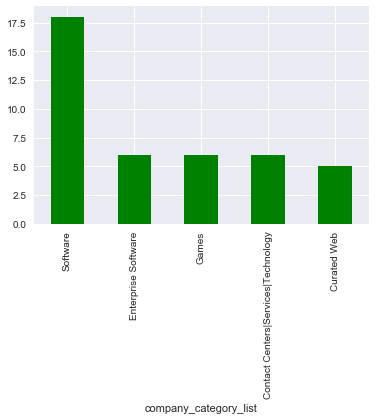

In [171]:
micro = acqui[(acqui.acquirer_name == 'Microsoft')]
mic = micro.groupby(['company_category_list']).size().sort_values(ascending=False)
mic.nlargest(5).plot(kind='Bar',color = 'g')

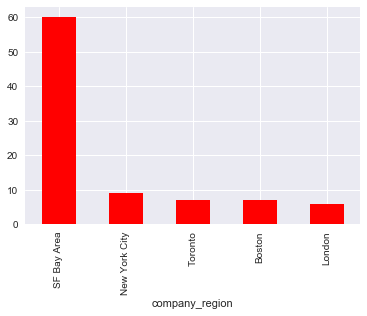

In [172]:
goog = acqui[(acqui.acquirer_name == 'Google')]
go = goog.groupby(['company_region']).size().sort_values(ascending=False)
go.nlargest(5).plot(kind='Bar',color = 'r')

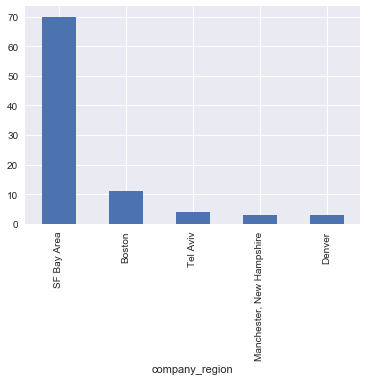

In [173]:
c = acqui[(acqui.acquirer_name == 'Cisco')]
g = c.groupby(['company_region']).size().sort_values(ascending=False)
g.nlargest(5).plot(kind='bar')

In [174]:
bio = acqui[acqui.company_category_list == 'Biotechnology']

In [256]:
bio.acquirer_name.value_counts().sum()

546

In [258]:
soft = acqui[acqui.company_category_list == 'Software']
soft.acquirer_name.value_counts().sum()

1459

In [177]:
invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168647 entries, 0 to 168646
Data columns (total 18 columns):
company_permalink          168647 non-null object
company_name               168646 non-null object
company_category_list      165015 non-null object
company_country_code       158126 non-null object
company_state_code         155216 non-null object
company_region             156162 non-null object
company_city               156164 non-null object
investor_permalink         168635 non-null object
investor_name              168635 non-null object
investor_country_code      137708 non-null object
investor_state_code        123908 non-null object
investor_region            125430 non-null object
investor_city              136483 non-null object
funding_round_permalink    168647 non-null object
funding_round_type         168647 non-null object
funding_round_code         81062 non-null object
funded_at                  168647 non-null object
raised_amount_usd          147028 non-nu

In [178]:
invest.funding_round_type.value_counts().head()

venture           104157
seed               43747
angel               6493
undisclosed         5608
private_equity      2779
Name: funding_round_type, dtype: int64

In [179]:
invest.investor_name.value_counts().head(10)

Sequoia Capital                     1033
Wayra                                936
500 Startups                         932
New Enterprise Associates            902
Intel Capital                        861
Y Combinator                         826
Accel                                779
Start-Up Chile                       727
Kleiner Perkins Caufield & Byers     727
SV Angel                             625
Name: investor_name, dtype: int64

In [180]:
invest.investor_region.value_counts().head(10)

SF Bay Area         37671
New York City       10786
Boston               8563
London               5464
Los Angeles          2729
Paris                2577
Washington, D.C.     2351
Chicago              2229
Seattle              2027
Tel Aviv             1984
Name: investor_region, dtype: int64

In [181]:
comps.status.value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

In [ ]:
invest.head()
#df_new = pd.merge(comps, invest, how='left', on=['company_name', 'company_category_list'])

In [184]:
comps1 = comps.rename(columns={'permalink': 'company_permalink', 'name': 'company_name'})
comps1.head()

,company_permalink,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,2015-01-05,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,2014-01-30,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [186]:
df_new = pd.merge(comps1, invest, how='inner', on=['company_name', 'company_permalink'])
df_new

,company_permalink,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,...,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2e+06
1,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,...,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN
2,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,...,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,4e+04
3,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,2e+07
4,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3e+06
5,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,2e+07
6,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,2013-01-03,2e+06
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,2014-07-19,9e+06
8,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Paxion Capital Partners,NaN,NaN,NaN,NaN,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,2e+07
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Transamerica,USA,IA,Cedar Rapids,Cedar Rapids,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,2e+07


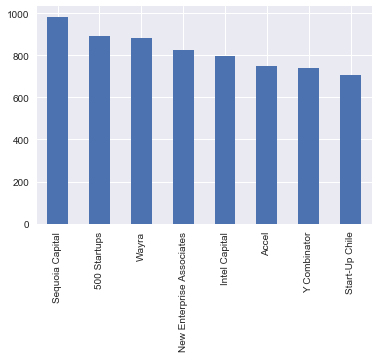

In [188]:
inv_ipo = df_new[(df_new.status == 'ipo')|(df_new.status == 'acquired')|(df_new.status == 'operating')]
inv_ipo.investor_name.value_counts().head(8).plot(kind='Bar')

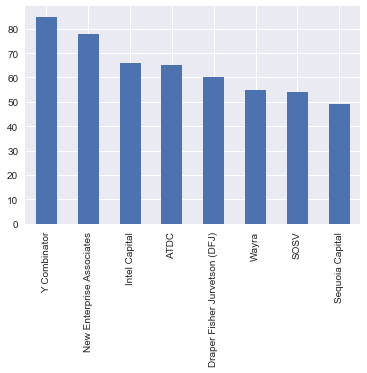

In [189]:
inv_close = df_new[df_new.status == 'closed']
inv_close.investor_name.value_counts().head(8).plot(kind='Bar')